In [287]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from pandas.api.types import is_string_dtype
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OrdinalEncoder
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE, MDS
from collections import defaultdict
from copy import deepcopy


sns.set()

In [288]:
df = pd.read_csv('data/responses.csv')
df = df.fillna(-1.0)
df.shape

(1010, 150)

In [289]:
def map_data_to_numeric_values(df):
  replace_dict = {}
  for col in df.columns:
    if is_string_dtype(df[col]):
      unique_values = df[col].unique()
      replace_dict[col] = dict(zip(unique_values, range(len(unique_values))))
  return df.replace(replace_dict)

df = map_data_to_numeric_values(df)
df.head()

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,Punk,"Hiphop, Rap","Reggae, Ska","Swing, Jazz",Rock n roll,Alternative,Latino,"Techno, Trance",Opera,Movies,Horror,Thriller,Comedy,Romantic,Sci-fi,War,Fantasy/Fairy tales,Animated,Documentary,Western,Action,History,Psychology,Politics,Mathematics,Physics,Internet,PC,Economy Management,Biology,...,New environment,Mood swings,Appearence and gestures,Socializing,Achievements,Responding to a serious letter,Children,Assertiveness,Getting angry,Knowing the right people,Public speaking,Unpopularity,Life struggles,Happiness in life,Energy levels,Small - big dogs,Personality,Finding lost valuables,Getting up,Interests or hobbies,Parents' advice,Questionnaires or polls,Internet usage,Finances,Shopping centres,Branded clothing,Entertainment spending,Spending on looks,Spending on gadgets,Spending on healthy eating,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0,5.0,4.0,2.0,5.0,4.0,4.0,1.0,5.0,5.0,3.0,1.0,2.0,1.0,5.0,1.0,3.0,3.0,5.0,3.0,5.0,3.0,...,4.0,3.0,4.0,3.0,4.0,3.0,5.0,1.0,1.0,3.0,5.0,5.0,1.0,4.0,5.0,1.0,4.0,3.0,2.0,3.0,4.0,3.0,0,3.0,4.0,5.0,3.0,3.0,1,3.0,20.0,163.0,48.0,1.0,0,0,0,0,0,0
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,4.0,1.0,3.0,1.0,4.0,4.0,2.0,1.0,1.0,5.0,2.0,2.0,4.0,3.0,4.0,1.0,3.0,5.0,4.0,1.0,4.0,1.0,3.0,4.0,5.0,2.0,4.0,4.0,5.0,1.0,...,4.0,4.0,4.0,4.0,2.0,4.0,2.0,2.0,5.0,4.0,4.0,4.0,1.0,4.0,3.0,5.0,3.0,4.0,5.0,3.0,2.0,3.0,0,3.0,4.0,1.0,4.0,2.0,5,2.0,19.0,163.0,58.0,2.0,0,0,0,0,1,0
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,4.0,1.0,4.0,3.0,5.0,5.0,5.0,1.0,3.0,5.0,3.0,4.0,4.0,2.0,4.0,2.0,5.0,5.0,2.0,2.0,1.0,1.0,2.0,1.0,5.0,2.0,4.0,2.0,4.0,1.0,...,3.0,4.0,3.0,5.0,3.0,4.0,4.0,3.0,4.0,3.0,2.0,4.0,4.0,4.0,4.0,3.0,3.0,3.0,4.0,5.0,3.0,1.0,0,2.0,4.0,1.0,4.0,3.0,4,2.0,20.0,176.0,67.0,2.0,0,0,1,0,1,0
3,5.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,4.0,2.0,2.0,1.0,2.0,5.0,1.0,2.0,1.0,5.0,4.0,4.0,3.0,3.0,4.0,3.0,1.0,2.0,5.0,1.0,2.0,4.0,4.0,5.0,4.0,1.0,3.0,1.0,2.0,3.0,...,1.0,5.0,3.0,1.0,3.0,3.0,2.0,5.0,5.0,4.0,5.0,3.0,3.0,2.0,2.0,1.0,2.0,1.0,1.0,-1.0,2.0,4.0,1,2.0,4.0,3.0,3.0,4.0,4,1.0,22.0,172.0,59.0,1.0,0,0,0,1,1,1
4,5.0,3.0,4.0,3.0,2.0,4.0,3.0,5.0,3.0,1.0,2.0,5.0,3.0,2.0,1.0,2.0,4.0,2.0,2.0,5.0,4.0,4.0,5.0,2.0,3.0,3.0,4.0,4.0,3.0,1.0,4.0,3.0,2.0,3.0,2.0,2.0,2.0,2.0,2.0,3.0,...,4.0,2.0,3.0,3.0,3.0,3.0,5.0,4.0,2.0,3.0,5.0,5.0,2.0,3.0,5.0,3.0,3.0,2.0,4.0,3.0,3.0,3.0,0,4.0,3.0,4.0,3.0,3.0,2,4.0,20.0,170.0,59.0,1.0,0,0,1,0,0,1


In [290]:
categories = {}

categories['Music'] = df.columns[range(19)]
categories['Movies'] = df.columns[range(19,31)]
categories['Hobbies'] = df.columns[range(31,63)]
categories['Phobias'] = df.columns[range(63,73)]
categories['Health'] = df.columns[range(73,76)]
categories['Habits'] = df.columns[range(133,140)]
categories['Demografics'] = df.columns[range(143,150)]

# I cry when I feel down or things don't go the right way.: Strongly disagree 1-2-3-4-5 Strongly agree
target = df['Life struggles']
target

0       1.0
1       1.0
2       4.0
3       3.0
4       2.0
       ... 
1005    4.0
1006    1.0
1007    5.0
1008    5.0
1009    2.0
Name: Life struggles, Length: 1010, dtype: float64

In [291]:
struggles_mean = np.mean(target)
struggles_mean

3.01980198019802

In [292]:
struggling = deepcopy(df.loc[df['Life struggles'] > struggles_mean])
struggling.shape

(405, 150)

In [293]:

non_struggling = deepcopy(df.loc[df['Life struggles'] <= struggles_mean])
non_struggling.shape

(605, 150)

In [294]:
binary_target = deepcopy(target)
binary_target[target <= struggles_mean] = 0
binary_target[target > struggles_mean] = 1
binary_target

0       0.0
1       0.0
2       1.0
3       0.0
4       0.0
       ... 
1005    1.0
1006    0.0
1007    1.0
1008    1.0
1009    0.0
Name: Life struggles, Length: 1010, dtype: float64

In [295]:
for cat_name, cat_cols in categories.items():
    data = deepcopy(df[cat_cols])
    ohe = OrdinalEncoder()
    ohe.fit(data)
    data = ohe.transform(data)
    logistic_regression = LogisticRegression(C=0.04)
    scores = cross_val_score(logistic_regression, data, binary_target, cv=6)
    print(cat_name, np.mean(scores))

Music 0.6455750446135061
Movies 0.7049462289846905
Hobbies 0.6960411383488306
Phobias 0.6535467737390814
Health 0.5910937353245046
Habits 0.6445595003287311
Demografics 0.6960411383488306


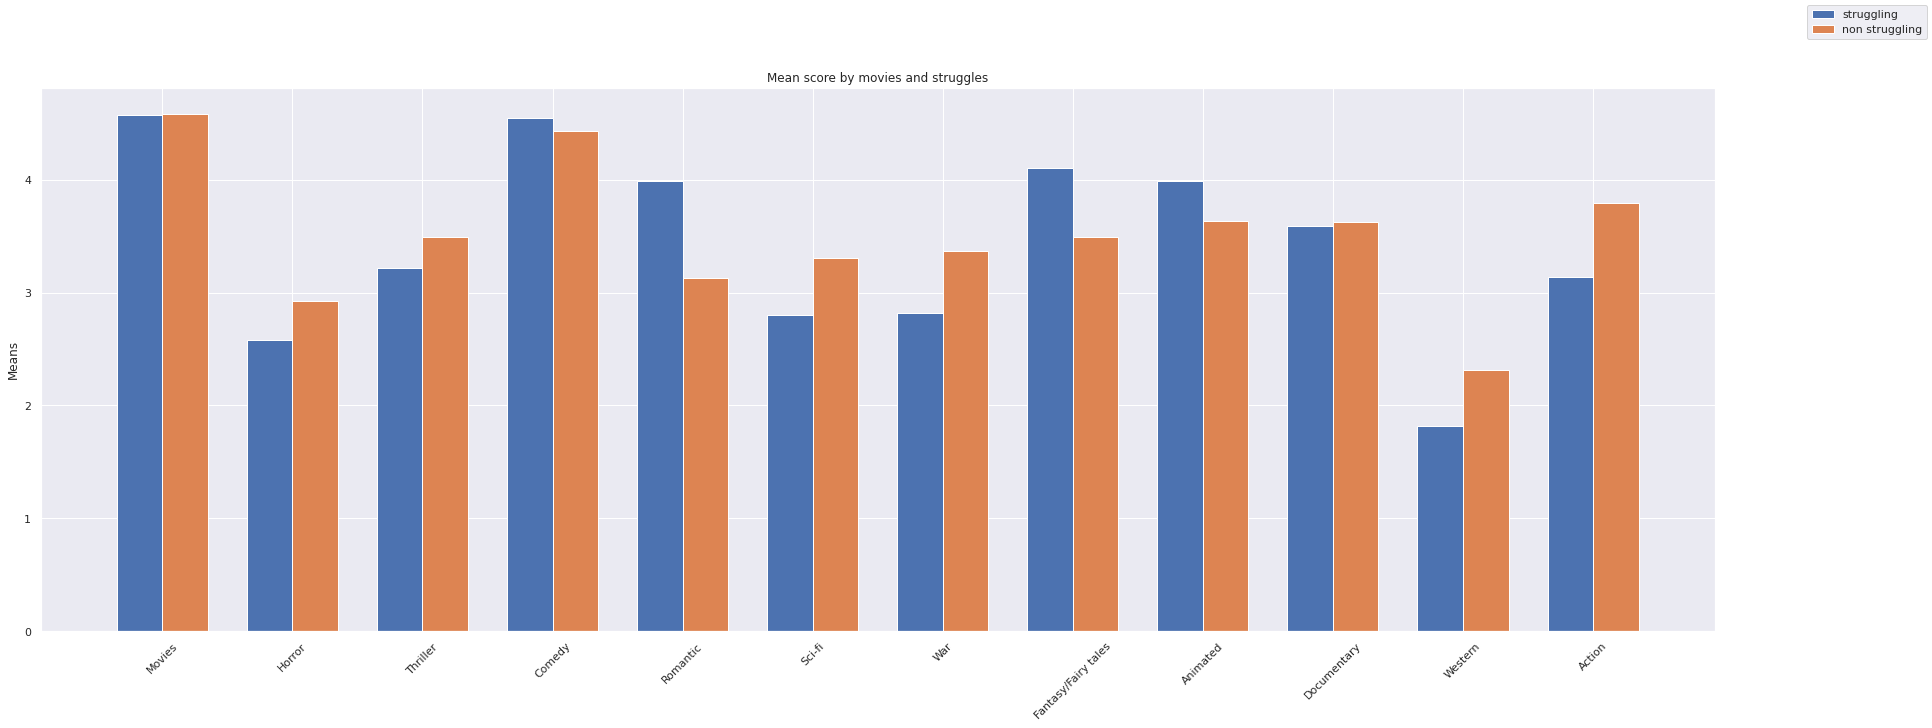

In [297]:
struggling_movies = struggling[categories['Movies']]
non_struggling_movies = non_struggling[categories['Movies']]

struggling_movies_avg = np.mean(struggling_movies, axis=0)
non_struggling_movies_avg = np.mean(non_struggling_movies, axis=0)

ind = np.arange(len(struggling_movies_avg))  # the x locations for the groups
width = 0.35
fig, ax = plt.subplots(figsize=(30,10))
rects1 = ax.bar(ind - width/2, struggling_movies_avg, width, label='struggling')
rects2 = ax.bar(ind + width/2, non_struggling_movies_avg, width, label='non struggling')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Means')
ax.set_title('Mean score by movies and struggles')
ax.set_xticks(ind)
ax.set_xticklabels(categories['Movies'], rotation=45)
fig.legend()
fig.show()